In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tp = pd.read_csv(r'Ecommerce ABI Enriched.csv', delimiter=',', low_memory= 'false')

C:\Users\avelurta\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (21,29,47,62,68,74,82,84,91,103,104,112,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
tp.head(30)
tp.shape

(359388, 141)

In [4]:
tp.columns

Index(['age', 'birth_date', 'birth_date_day', 'birth_date_month',
       'birth_date_year', 'channel', 'city', 'complement', 'country',
       'created_in',
       ...
       'ideal_glass', 'fermentation', 'style', 'category', 'subcategory',
       'country_of_production', 'is_abi', 'source_schema', 'food_pairing_tip',
       'time.1'],
      dtype='object', length=141)

In [5]:
tp.isnull().sum()

age                            359388
birth_date                     359388
birth_date_day                 359388
birth_date_month               359388
birth_date_year                359388
channel                        359388
city                           359388
complement                     359388
country                             0
created_in                          0
creation_brand                      0
district                       359388
document_id                    359388
document_id_unify              359388
email                          359388
emails                         359388
facebook_id                    359388
first_name                     359388
full_name                      359388
gender                         359388
id                                  0
id_1                           133049
identification_number          359388
identification_number_unify    359388
is_employee                    359388
last_name                      359388
mobile_numbe

In [6]:
tpf1 = tp.drop(['age','birth_date','birth_date_day','birth_date_month','birth_date_year','created_in','channel','city','complement','district','document_id','document_id_unify','email','emails','facebook_id','first_name','full_name','country_of_production',
       'food_pairing_tip','width','time', 'ideal_glass','table_origin','td_id', 'fermentation','origin_score',
       'style','ideal_temperature', 'local_subcategory', 'is_bundle', 'volume','source_system',
       'abv', 'units_per_sku','length','creation_brand', 'country_of_origin','height','business_name',
       'is_active','identification_number','source','title','td_id','system','currency',
       'identification_number_unify', 'is_employee','last_name','product_spk','business_spk',
       'mobile_number','neighborhood','number','phone_number','state','street','td_global_id',
       'time_creation', 'twitter_id','department','item_id', 'uniqueid', 'zipcode', 'cuit_cuil',
       'dni', 'id_2', 'id_3','gender', 'id_1','unit_discount_local','td_id.1','customer_first_order_period','customer_first_order_year',
       'unit_delivery_cost_local', 'is_incomplete', 'coupon_code','unit_tax_usd','unit_tax_local',
       'order_rating','unit_subtotal_charged_usd','delivery_type',
       'unit_subtotal_charged_local', 'unit_delivery_cost_usd', 'order_type',
       'unit_product_cost_local','unit_margin_usd','product_url','is_test','unit_product_cost_usd',
       'unit_margin_local', 'unit_volume','description', 'body', 'local_category', 'date_retired',
       'is_returnable_glass_bottle', 'ean', 'row_updated_at', 'brand_category','elegible_discount_spk','delivery_address_spk','discount_name','operator_nk','discount_spk','image_url','upc','opt_in','id_4','weight','source_schema','is_abi','time.1','product_nk'], axis = 1)

In [7]:
tpf1.isnull().sum()

country                            0
id                                 0
unit_discount_usd                  0
customer_first_order_date          0
unit_gross_revenue_local           0
unit_delivery_charged_usd          0
unit_net_revenue_usd               0
order_date                         0
order_status                       0
order_status_type                  0
customer_spk                       0
unit_price_charged_local           0
unit_gross_revenue_usd             0
source_system_order_id             0
unit_delivery_charged_local        0
rate_local_do_usd                  0
quantity                           0
unit_price_charged_usd             0
unit_net_revenue_local             0
order_days_after_first_order       0
order_time                         0
row_created_at                     0
sku                              616
brand                           2520
date_created                    2333
name                               0
category                        4954
s

In [8]:
tp_arg = tpf1.loc[tpf1['country'] == 'Argentina']

In [9]:
tp_f = tp_arg.dropna(1, how= 'all' )
tp_f.isnull().sum()

country                            0
id                                 0
unit_discount_usd                  0
customer_first_order_date          0
unit_gross_revenue_local           0
unit_delivery_charged_usd          0
unit_net_revenue_usd               0
order_date                         0
order_status                       0
order_status_type                  0
customer_spk                       0
unit_price_charged_local           0
unit_gross_revenue_usd             0
source_system_order_id             0
unit_delivery_charged_local        0
rate_local_do_usd                  0
quantity                           0
unit_price_charged_usd             0
unit_net_revenue_local             0
order_days_after_first_order       0
order_time                         0
row_created_at                     0
sku                              616
brand                           1166
date_created                     979
name                               0
category                        3600
s

In [10]:
##Cambio todos los brands de importadas por 'importadas'
tp_f.brand = tp_f.brand.replace(to_replace = ['Cervecería Antares','Flensburger Brauerei','Fábricas Nacionales De Cerveza', 'Fabricas Nacionales De Cerveza', 'Cerveceria Artesanal El Bolson', 'Peñón del Águila', 'Leffe', 'Spaten-Franziskaner-Bräu', 'BBC', 'Cervecería Artesanal El Bolson',
       'Anchor Brewing Company', 'Bass Brewery', 'Hofbräu München',
       'Adnams', "Fuller's", 'Karlsberg Brauerei',
       'Les Brasseurs de Gayant\xa0',
       'Brouwerij Van Steenberge', 'Hoegaarden',
       'Fuegian Beverage Company',
       'De La Vaca Tranquila Cervezas Artesanales', 'Tsingtao',
       'Löwenbräu', 'unknown', 'Barba Roja', 'Coopers Brewery',
       'Backus y Johnston', 'Brauerei Beck & Co', 'MixxTail', 'Shock Top',
       'Bogotá Beer Company',
       'Czechvar', 'Belle-Vue', 'Paulaner Brauerei München',
       'Duvel Moortgat', 'Zillertal', 'Baltika Breweries', 'Chimay',
       'Kronenbourg 1664', 'Kulmbacher Brauerei AG', 'Grimbergen',
       'Maredsous',
       'franziskaner', 'Condeminal', 'Erdinger Weissbräu',
       'Brasserie de Silly', 'SAB Miller','Bodega Budeguer',
       'Skol', 'Belsh', 'OETTINGER Brauerei GmbH', 'Águila Real', 'Hertog Jan', 'Manos Negras', 'Freixenet',
       'The Fran-C Wines', 'Finca Ferrer', 'Bodega Renacer', 'Oranjeboom',
       'Maal Wines', 'Tinto Negro', 'Corbeau Wines',
       'Mosquita Muerta Wines', 'Bodega del Desierto', 'Antigua',
       'Boris Biere', 'Barceló', 'Boddingtons', 'Bombay', 'Jägermeister',
       'Revancha', 'Huentala Wines', 'Bodega Cruz Primero', 'Aura',
       'Harvierstoun', 'Chivas Regal', 'Weidmann', 'Isle of Jura', 'Belenkaya',
       '2km', "Jack Daniel's", 'Johnnie Walker', 'Whyte & Mackay',
       'The Patrón Spirits Company', 'Amarula', 'Havana Club',
       'Matías Riccitelli', 'Mulata', 'Rye', 'Mundo Revés', 'Brahma',
       'Bodega José Luis Mounier', 'José Cuervo', 'Jim Beam', 'Bier Life',
       'Makers Mark', 'Mistral', 'Príncipe de los Apóstoles',
       'Flor de Caña', 'Bacardi', 'Absolut', 'Pravda', 'Greene King',
       'SKYY', 'Hennessy', 'Noctua', 'Jameson', 'Traslapiedra',
       'Bodega Ojo de Vino', 'Tres14', 'Velho Barreiro', 'Van Pur',
       'SIAM', 'Beluga', 'Bottega', 'Campari', 'The Glenrothes',
       'Cinzano', 'Xoriguer', 'El Jimador', 'Kahlúa', 'Malibu', 'Aperol',
       'The Botanist', 'Brasserie de Luxemburgo Mousel - Diekrich',
       'The Famous Grouse', 'MG Destilerías', 'Grand Marnier',
       'Cointreau', 'Finca Beth', 'The Mula Cervezas Especiales',
       'Anima Mundi'],value = 'importada')


In [11]:
tp_f.brand = tp_f.brand.replace(to_replace = ['Grupo Modelo'],value = 'Corona')

In [12]:
tp_f.head(50)
tp_f['rate_local_do_usd'].unique()

array([0.0509, 0.0638, 0.0603, 0.0497, 0.0361, 0.0354])

In [13]:
tpf1.isnull().sum()

country                            0
id                                 0
unit_discount_usd                  0
customer_first_order_date          0
unit_gross_revenue_local           0
unit_delivery_charged_usd          0
unit_net_revenue_usd               0
order_date                         0
order_status                       0
order_status_type                  0
customer_spk                       0
unit_price_charged_local           0
unit_gross_revenue_usd             0
source_system_order_id             0
unit_delivery_charged_local        0
rate_local_do_usd                  0
quantity                           0
unit_price_charged_usd             0
unit_net_revenue_local             0
order_days_after_first_order       0
order_time                         0
row_created_at                     0
sku                              616
brand                           2520
date_created                    2333
name                               0
category                        4954
s

In [14]:
tp_f.shape

(133049, 28)

In [15]:
## Algunos comentarios: 
##   No hay info de 2019, termina en 18 Agosto 2018
##   id podriamos usarlo para saber cuanto gasta una persona en promedio en ecommerce, ver evolucion
##   Bevybar y Craft Society son cosas sin marca, habria que unirlas

cant_NaNf = tp_f.isnull().sum()
print(cant_NaNf,'\r\n')

country                            0
id                                 0
unit_discount_usd                  0
customer_first_order_date          0
unit_gross_revenue_local           0
unit_delivery_charged_usd          0
unit_net_revenue_usd               0
order_date                         0
order_status                       0
order_status_type                  0
customer_spk                       0
unit_price_charged_local           0
unit_gross_revenue_usd             0
source_system_order_id             0
unit_delivery_charged_local        0
rate_local_do_usd                  0
quantity                           0
unit_price_charged_usd             0
unit_net_revenue_local             0
order_days_after_first_order       0
order_time                         0
row_created_at                     0
sku                              616
brand                           1166
date_created                     979
name                               0
category                        3600
s

In [16]:
##Tabla para ver cuantas veces compró cada usuario
compras_usuario = tp_f.groupby(['id'])['id'].count()
compras_usuario = compras_usuario.loc[compras_usuario < 10]
compras_usuario.describe

<bound method NDFrame.describe of id
["ar_bevybar;00005c5b185e25f9c7b9642ca76950fe43e4fcce6c02cbbf7a8768f2dd1ed395"]    3
["ar_bevybar;00010fe97133694cb929e412dba2d425dfa510e6193b75c2d314e32720c2abbf"]    4
["ar_bevybar;00036c6ab89d9a91e03876ca8dae2087fbd765a7a8abc9c57839248342cf56f0"]    1
["ar_bevybar;0004e1e6b290d864e2776edc0ddd5ad41eb651a793dfaaa8a0053d25bcc3b741"]    2
["ar_bevybar;0005c424ba71c03ac51d8a08844d281966d94b9cd2c5392c1d5b502c83c752ab"]    3
["ar_bevybar;00078c1eb18da02b9da6835c16bdf960a37fb1fa830f0a5c75145bcab5107721"]    4
["ar_bevybar;0008677f0ecc3a797ce5941630f876d9fcee2bc34b59b7b3bbc79ae19b0e2b76"]    1
["ar_bevybar;000a451eba39ef9e3dca6a960bf3bf01b79183e5115c53d5f5509d4fa0e3bf0c"]    2
["ar_bevybar;000a79e8f3fbccdb6ce37315cbbb5d2baeed8e38a1468ad67cfb43c74a79304c"]    1
["ar_bevybar;000e1fc55ebe0cdfb84cc02b15cffa8fa15d55433eac1e7906f12b0e040e20da"]    1
["ar_bevybar;000e543f23e746222bf33c18c305b4baeefe679367e11fa553ecd572bff89f75"]    1
["ar_bevybar;000e8d3fcdd026d

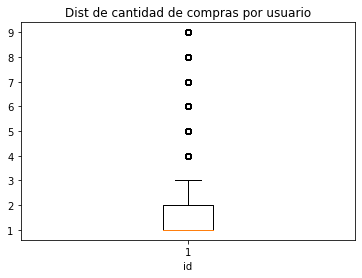

In [17]:
plt.boxplot(compras_usuario)
plt.title("Dist de cantidad de compras por usuario")
plt.xlabel("id")
plt.show()

In [18]:
tp_f['brand'].unique()

array(['Corona', 'Patagonia Brewing Co.', 'Stella Artois', 'importada',
       'BevyBar', 'Multimarca', 'Craft Society',
       'Cervecería y Maltería Quilmes', nan, 'Budweiser', 'Andes Origen'],
      dtype=object)

In [19]:
tp_f.brand.value_counts()

importada                        45176
Stella Artois                    26870
Patagonia Brewing Co.            19573
BevyBar                          17801
Corona                           17401
Cervecería y Maltería Quilmes     1688
Multimarca                        1687
Craft Society                     1261
Budweiser                          300
Andes Origen                       126
Name: brand, dtype: int64

In [20]:
tp_f.category.value_counts()

Mixed Pack      68524
Beer            44355
Merchandise     11067
unknown          3568
Wine             1237
Spirits           651
Home Brewing       47
Name: category, dtype: int64

In [21]:
##Voy a buscar dejar un dataset solo con las marcas de cerveza, y con las importadas agrupadas
tp_f = tp_f.loc[tp_f['category'].isin(['Mixed Pack', 'Beer', 'Merchandise','unknown'])]
tp_f.shape

(127514, 28)

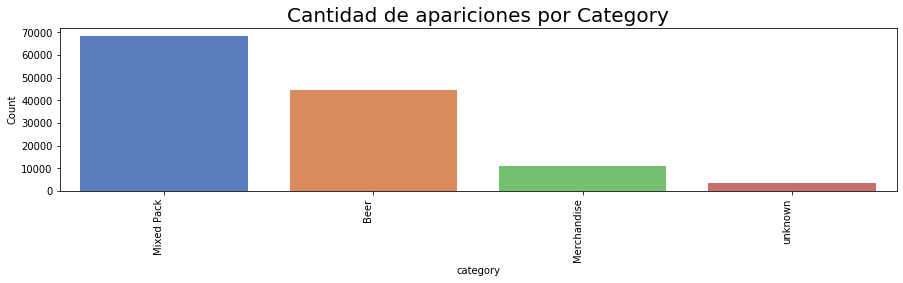

In [22]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="category",data= tp_f, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de apariciones por Category',size = 20)
plt.xlabel("category")
plt.ylabel("Count")
plt.show()

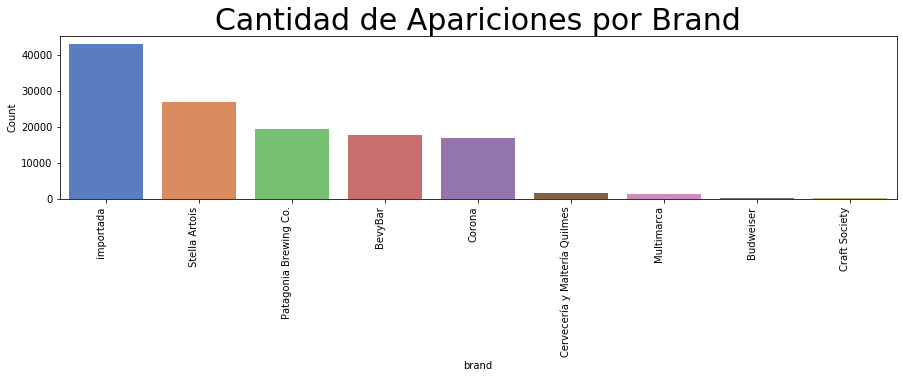

In [23]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="brand",data=tp_f, palette = "muted", order = tp_f['brand'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de Apariciones por Brand',size = 30)
plt.xlabel("brand")
plt.ylabel("Count")
plt.show()

In [24]:
##tp_f.created_in.value_counts()

In [25]:
tp_f.order_status.value_counts()
##Borrar los grand_total_is_zero

paid                   114350
grand_total_is_zero      9952
pending                  1612
refunded                 1075
partially_refunded        509
authorized                 10
partially_paid              6
Name: order_status, dtype: int64

In [26]:
tp_f.brand.unique()

array(['Corona', 'Patagonia Brewing Co.', 'Stella Artois', 'importada',
       'BevyBar', 'Multimarca', 'Cervecería y Maltería Quilmes',
       'Craft Society', nan, 'Budweiser'], dtype=object)

In [27]:
tp_f.head()

,country,id,unit_discount_usd,customer_first_order_date,unit_gross_revenue_local,unit_delivery_charged_usd,unit_net_revenue_usd,order_date,order_status,order_status_type,...,unit_net_revenue_local,order_days_after_first_order,order_time,row_created_at,sku,brand,date_created,name,category,subcategory
17160,Argentina,"[""ar_bevybar;1b427493e7cc5228ccfdb5f70253e7ef1...",0.000,2018-01-12,1810.0,22.9140,67.7875,2018-01-12,paid,Valid,...,1331.2550,0,14:33:50,2018-08-20 07:30:23.707858,CRW-BP-14,Corona,2016-04-18 10:42:34,Pack Conservadora Corona,Mixed Pack,unknown
17161,Argentina,"[""ar_bevybar;f14a46180a983653d1e151da458045331...",0.000,2016-05-16,813.0,9.5670,51.8531,2016-05-16,paid,Valid,...,813.0000,0,19:03:01,2017-12-20 17:30:23.975147,6109617020,Patagonia Brewing Co.,2016-05-10 14:23:04,Pack Colección Patagonia XL,Mixed Pack,unknown
17162,Argentina,"[""ar_bevybar;8b3eb4b88a85ba3eeb60dd24686995c38...",0.000,2017-09-20,1030.0,8.4434,47.5275,2017-09-20,paid,Valid,...,788.0530,0,18:19:39,2017-12-20 17:30:22.373984,6105600014,Corona,2017-05-29 09:29:41,Pack Corona Experience,Beer,Others
17163,Argentina,"[""ar_bevybar;9963d5cb526be2da8348e97b810925743...",0.000,2018-04-18,1914.0,11.9160,73.8954,2018-04-18,paid,Valid,...,1488.3264,0,23:44:33,2018-08-20 07:30:23.707858,CRW-BP-14,Corona,2016-04-18 10:42:34,Pack Conservadora Corona,Mixed Pack,unknown
17164,Argentina,"[""ar_bevybar;83c601952cc40eb2355a4ea33c7bb4bb9...",6.378,2016-12-12,1035.0,7.3347,66.0123,2016-12-12,paid,Valid,...,1035.0000,0,16:16:57,2017-12-20 17:30:23.975147,4003101006,Stella Artois,2016-02-24 19:07:55,Copas Stella Artois 250ml - Pack 6 unidades,Mixed Pack,unknown


In [28]:
##Ver si en alguna estacionalidad se vende mas el merchandising o alguna marca en particular
##Mostrar Cantidad de Ventas (Apariciones por brand) segun Beer, Merchandise y Mixed Pack
##Buscar si estan las columnas de lat y long y ver si podemos hacer un heatmap
##Separar fechas (por lo menos por mes) y analizar en que epoca se vende mas (verano?aguinaldo?)
##Todas las filas que tengan el order_status = grand_total_is_zero
##row_created_at
#order_status_type
#customer_spk

In [29]:
tp_f.order_date = pd.to_datetime(tp_f.order_date)
tp_f['year'] = tp_f.order_date.dt.year 
tp_f['month'] = tp_f.order_date.dt.month 
tp_f['day'] = tp_f.order_date.dt.day 
tp_f.head()

,country,id,unit_discount_usd,customer_first_order_date,unit_gross_revenue_local,unit_delivery_charged_usd,unit_net_revenue_usd,order_date,order_status,order_status_type,...,row_created_at,sku,brand,date_created,name,category,subcategory,year,month,day
17160,Argentina,"[""ar_bevybar;1b427493e7cc5228ccfdb5f70253e7ef1...",0.000,2018-01-12,1810.0,22.9140,67.7875,2018-01-12,paid,Valid,...,2018-08-20 07:30:23.707858,CRW-BP-14,Corona,2016-04-18 10:42:34,Pack Conservadora Corona,Mixed Pack,unknown,2018,1,12
17161,Argentina,"[""ar_bevybar;f14a46180a983653d1e151da458045331...",0.000,2016-05-16,813.0,9.5670,51.8531,2016-05-16,paid,Valid,...,2017-12-20 17:30:23.975147,6109617020,Patagonia Brewing Co.,2016-05-10 14:23:04,Pack Colección Patagonia XL,Mixed Pack,unknown,2016,5,16
17162,Argentina,"[""ar_bevybar;8b3eb4b88a85ba3eeb60dd24686995c38...",0.000,2017-09-20,1030.0,8.4434,47.5275,2017-09-20,paid,Valid,...,2017-12-20 17:30:22.373984,6105600014,Corona,2017-05-29 09:29:41,Pack Corona Experience,Beer,Others,2017,9,20
17163,Argentina,"[""ar_bevybar;9963d5cb526be2da8348e97b810925743...",0.000,2018-04-18,1914.0,11.9160,73.8954,2018-04-18,paid,Valid,...,2018-08-20 07:30:23.707858,CRW-BP-14,Corona,2016-04-18 10:42:34,Pack Conservadora Corona,Mixed Pack,unknown,2018,4,18
17164,Argentina,"[""ar_bevybar;83c601952cc40eb2355a4ea33c7bb4bb9...",6.378,2016-12-12,1035.0,7.3347,66.0123,2016-12-12,paid,Valid,...,2017-12-20 17:30:23.975147,4003101006,Stella Artois,2016-02-24 19:07:55,Copas Stella Artois 250ml - Pack 6 unidades,Mixed Pack,unknown,2016,12,12


In [30]:
tp_h = tp_f.drop(['unit_gross_revenue_usd', 'source_system_order_id', 'rate_local_do_usd', 'order_days_after_first_order', 'unit_price_charged_usd', 'unit_discount_usd', 'customer_first_order_date', 'unit_delivery_charged_usd', 'unit_net_revenue_usd', 'row_created_at', 'sku', 'date_created'], axis=1)
tp_h.head()

,country,id,unit_gross_revenue_local,order_date,order_status,order_status_type,customer_spk,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,order_time,brand,name,category,subcategory,year,month,day
17160,Argentina,"[""ar_bevybar;1b427493e7cc5228ccfdb5f70253e7ef1...",1810.0,2018-01-12,paid,Valid,ar_bevybar;1b427493e7cc5228ccfdb5f70253e7ef1b1...,1360.0,450.0,1,1331.2550,14:33:50,Corona,Pack Conservadora Corona,Mixed Pack,unknown,2018,1,12
17161,Argentina,"[""ar_bevybar;f14a46180a983653d1e151da458045331...",813.0,2016-05-16,paid,Valid,ar_bevybar;f14a46180a983653d1e151da45804533103...,663.0,150.0,1,813.0000,19:03:01,Patagonia Brewing Co.,Pack Colección Patagonia XL,Mixed Pack,unknown,2016,5,16
17162,Argentina,"[""ar_bevybar;8b3eb4b88a85ba3eeb60dd24686995c38...",1030.0,2017-09-20,paid,Valid,ar_bevybar;8b3eb4b88a85ba3eeb60dd24686995c38b4...,890.0,140.0,1,788.0530,18:19:39,Corona,Pack Corona Experience,Beer,Others,2017,9,20
17163,Argentina,"[""ar_bevybar;9963d5cb526be2da8348e97b810925743...",1914.0,2018-04-18,paid,Valid,ar_bevybar;9963d5cb526be2da8348e97b810925743d4...,1674.0,240.0,1,1488.3264,23:44:33,Corona,Pack Conservadora Corona,Mixed Pack,unknown,2018,4,18
17164,Argentina,"[""ar_bevybar;83c601952cc40eb2355a4ea33c7bb4bb9...",1035.0,2016-12-12,paid,Valid,ar_bevybar;83c601952cc40eb2355a4ea33c7bb4bb983...,510.0,115.0,2,1035.0000,16:16:57,Stella Artois,Copas Stella Artois 250ml - Pack 6 unidades,Mixed Pack,unknown,2016,12,12


In [31]:
tp_h.isnull().sum()

country                          0
id                               0
unit_gross_revenue_local         0
order_date                       0
order_status                     0
order_status_type                0
customer_spk                     0
unit_price_charged_local         0
unit_delivery_charged_local      0
quantity                         0
unit_net_revenue_local           0
order_time                       0
brand                          187
name                             0
category                         0
subcategory                      0
year                             0
month                            0
day                              0
dtype: int64

In [32]:
#Ordeno por fecha para ver cuando es la primer compra y cuando la última
tp_h.sort_values('order_date')
#La primera se da en Febrero de 2016 y la última en Agosto de 2018. Tener esto en cuenta para cuando
#hagamos análisis de estacionalidad. Habría que ver cuando se da el primer registro de c/ marca.

,country,id,unit_gross_revenue_local,order_date,order_status,order_status_type,customer_spk,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,order_time,brand,name,category,subcategory,year,month,day
47861,Argentina,"[""ar_bevybar;dc27100efc4b56b75c9e3985aea5530dc...",22.0000,2016-02-08,authorized,Invalid,ar_bevybar;dc27100efc4b56b75c9e3985aea5530dc95...,22.0,0.0000,1,22.0000,15:22:30,Cervecería y Maltería Quilmes,Cerveza Andes,Beer,unknown,2016,2,8
273633,Argentina,"[""ar_bevybar;d100c3cbfcff5440fc04f9a61d72f3cab...",22.0000,2016-02-08,authorized,Invalid,ar_bevybar;d100c3cbfcff5440fc04f9a61d72f3cabb8...,22.0,0.0000,1,22.0000,18:34:38,Cervecería y Maltería Quilmes,Cerveza Andes,Beer,unknown,2016,2,8
185507,Argentina,"[""ar_bevybar;eb9a7ef58baf3da315635c9245d96b1a2...",22.0000,2016-02-09,authorized,Invalid,ar_bevybar;eb9a7ef58baf3da315635c9245d96b1a20b...,22.0,0.0000,1,22.0000,15:47:42,Cervecería y Maltería Quilmes,Cerveza Andes,Beer,unknown,2016,2,9
243380,Argentina,"[""ar_bevybar;595f1b23634e830fee0116253babcb802...",40.0000,2016-02-25,authorized,Invalid,ar_bevybar;595f1b23634e830fee0116253babcb80256...,40.0,0.0000,1,40.0000,18:02:24,Cervecería y Maltería Quilmes,Cerveza Andes Honey,Beer,unknown,2016,2,25
243381,Argentina,"[""ar_bevybar;595f1b23634e830fee0116253babcb802...",240.0000,2016-02-25,authorized,Invalid,ar_bevybar;595f1b23634e830fee0116253babcb80256...,240.0,0.0000,1,240.0000,18:02:24,Cervecería y Maltería Quilmes,Cerveza Andes Honey,Beer,unknown,2016,2,25
243383,Argentina,"[""ar_bevybar;595f1b23634e830fee0116253babcb802...",622.0000,2016-02-25,authorized,Invalid,ar_bevybar;595f1b23634e830fee0116253babcb80256...,622.0,0.0000,1,622.0000,18:02:24,Corona,Pack Modelo Mexicano,Mixed Pack,unknown,2016,2,25
273642,Argentina,"[""ar_bevybar;d100c3cbfcff5440fc04f9a61d72f3cab...",878.0000,2016-02-26,authorized,Invalid,ar_bevybar;d100c3cbfcff5440fc04f9a61d72f3cabb8...,878.0,0.0000,1,878.0000,20:28:28,NaN,Pack Del Sur a Casa,Mixed Pack,unknown,2016,2,26
273635,Argentina,"[""ar_bevybar;d100c3cbfcff5440fc04f9a61d72f3cab...",132.0000,2016-02-26,authorized,Invalid,ar_bevybar;d100c3cbfcff5440fc04f9a61d72f3cabb8...,132.0,0.0000,1,132.0000,20:28:28,Cervecería y Maltería Quilmes,Cerveza Andes,Beer,unknown,2016,2,26
273634,Argentina,"[""ar_bevybar;d100c3cbfcff5440fc04f9a61d72f3cab...",22.0000,2016-02-26,authorized,Invalid,ar_bevybar;d100c3cbfcff5440fc04f9a61d72f3cabb8...,22.0,0.0000,1,22.0000,20:28:28,Cervecería y Maltería Quilmes,Cerveza Andes,Beer,unknown,2016,2,26
273636,Argentina,"[""ar_bevybar;d100c3cbfcff5440fc04f9a61d72f3cab...",122.0000,2016-02-29,authorized,Invalid,ar_bevybar;d100c3cbfcff5440fc04f9a61d72f3cabb8...,22.0,100.0000,1,122.0000,18:01:39,Cervecería y Maltería Quilmes,Cerveza Andes,Beer,unknown,2016,2,29


In [33]:
#Me fijo las cantidades totales de categoría por todos los meses. Sería mejor ver año por año mas que la suma de todes
tp_pivot_cat = pd.pivot_table(data = tp_h, values = ['quantity'], index = ['month'], columns = ['category'], aggfunc= np.sum, )
tp_pivot_cat

quantity                               
category     Beer Merchandise Mixed Pack unknown
month                                           
1            7227         973       5045      30
2            5794        2815       8103       6
3           13528        2397       8889      71
4            9887         930       5959      50
5            5670        1244      12106     843
6           15181        1501       6088    1506
7           14221        1460       6526    1182
8            6665        1183       3881     928
9            8453        1380       4304      24
10           6499         979       6481      14
11           7299         923       8283      32
12          10596        1459       7036      79

In [34]:
#Idem anterior pero por marca
tp_pivot_brand = pd.pivot_table(data = tp_h, values = ['quantity'], index = ['month'], columns = ['brand'], aggfunc= np.sum, )
tp_pivot_brand

quantity                                                                \
brand  BevyBar Budweiser Cervecería y Maltería Quilmes  Corona Craft Society   
month                                                                          
1        721.0       NaN                         129.0  2937.0           NaN   
2        825.0       NaN                         168.0   700.0           NaN   
3       1198.0       NaN                         646.0  3351.0           NaN   
4       1365.0       NaN                         197.0  2156.0           NaN   
5       4871.0      11.0                         218.0  2465.0           NaN   
6       1693.0     173.0                         308.0  1820.0          19.0   
7       1569.0      34.0                         297.0  2725.0         271.0   
8        877.0      93.0                         449.0  1808.0          15.0   
9        340.0       NaN                         132.0  1725.0           NaN   
10      2478.0       NaN                          72.0  2199.0           NaN   
11      2154.0       NaN                          79.0  2319.0           NaN   
12      2674.0       NaN                         356.0  2128.0           NaN   

                                                                
brand Multimarca Patagonia Brewing Co. Stella Artois importada  
month                                                           
1            NaN                2001.0        1762.0    5725.0  
2            NaN                1546.0        9071.0    4407.0  
3            NaN                1968.0        6052.0   11572.0  
4            5.0                1812.0        2250.0    8975.0  
5          291.0                2782.0        3161.0    6028.0  
6          577.0                2913.0        3003.0   13754.0  
7          249.0                3575.0        2232.0   12428.0  
8          286.0                2204.0        1954.0    4969.0  
9            NaN                3169.0        1985.0    6810.0  
10           NaN                2411.0        1694.0    5119.0  
11           NaN                2352.0        3335.0    6298.0  
12           NaN                2305.0        2913.0    8794.0

In [35]:
#esta sería la pivot de las pivots, la idea es ver todo por mes para saber mejor la distribución
tp_pivot_two = pd.pivot_table(data = tp_h, values = ['quantity'], index = ['month'], columns = ['brand', 'category'], aggfunc= np.sum, )
tp_pivot_two
#budweiser tiene todo unknown, y patagonia solo se compró mixed pack por ej.

quantity                                           \
brand     BevyBar                                Budweiser   
category     Beer Merchandise Mixed Pack unknown   unknown   
month                                                        
1             7.0         NaN      714.0     NaN       NaN   
2             3.0         3.0      819.0     NaN       NaN   
3             5.0         4.0     1189.0     NaN       NaN   
4            51.0         5.0     1309.0     NaN       NaN   
5            56.0         7.0     4090.0   718.0      11.0   
6           112.0         4.0     1532.0    45.0     173.0   
7           205.0        10.0     1354.0     NaN      34.0   
8           271.0         5.0      601.0     NaN      93.0   
9             1.0        21.0      318.0     NaN       NaN   
10           23.0         6.0     2449.0     NaN       NaN   
11           15.0        10.0     2129.0     NaN       NaN   
12            6.0        50.0     2618.0     NaN       NaN   

                                                                               \
brand    Cervecería y Maltería Quilmes                                 Corona   
category                          Beer Merchandise Mixed Pack unknown    Beer   
month                                                                           
1                                 76.0        12.0       40.0     1.0   640.0   
2                                102.0         8.0       57.0     1.0   305.0   
3                                612.0         3.0       30.0     1.0   852.0   
4                                146.0        18.0       31.0     2.0   467.0   
5                                 36.0        18.0      144.0    20.0   395.0   
6                                 46.0        14.0       56.0   192.0   805.0   
7                                 18.0        77.0      193.0     9.0  1527.0   
8                                273.0        28.0      122.0    26.0   925.0   
9                                 40.0        37.0       55.0     NaN  1134.0   
10                                 4.0        21.0       47.0     NaN  1676.0   
11                                 3.0        14.0       61.0     1.0   871.0   
12                               316.0         9.0       30.0     1.0   731.0   

          ...                                                          \
brand     ... Patagonia Brewing Co.         Stella Artois               
category  ...            Mixed Pack unknown          Beer Merchandise   
month     ...                                                           
1         ...                1047.0    11.0         379.0       493.0   
2         ...                 930.0     1.0         749.0      2434.0   
3         ...                1192.0     7.0         631.0      1395.0   
4         ...                1057.0     7.0         196.0       477.0   
5         ...                1943.0     1.0         141.0       687.0   
6         ...                1284.0   382.0         215.0       933.0   
7         ...                2246.0   355.0         204.0       711.0   
8         ...                1097.0   296.0          92.0       711.0   
9         ...                1991.0     NaN         291.0       563.0   
10        ...                1782.0     1.0         253.0       447.0   
11        ...                1491.0     1.0         532.0       345.0   
12        ...                1078.0     3.0         562.0       652.0   

                                                                      
brand                       importada                                 
category Mixed Pack unknown      Beer Merchandise Mixed Pack unknown  
month                                                                 
1             890.0     NaN    5370.0        58.0      279.0    18.0  
2            5888.0     NaN    4151.0        14.0      238.0     4.0  
3            4013.0    13.0   10799.0       359.0      364.0    50.0  
4            1569.0     8.0    8419.0        88.0    

In [36]:
#Hago 3 datasets que agrupen por año, mes y día c/u, así podemos ver la variación, Quedaría mejor con barras
tp_by_year = tp_h.groupby(['year']).sum()
tp_by_month = tp_h.groupby(['month']).sum()
tp_by_day = tp_h.groupby(['day']).sum()

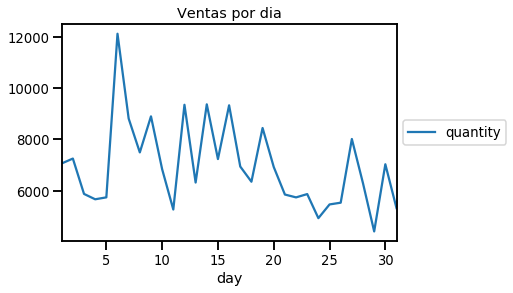

In [37]:
sns.set_context("talk", font_scale=0.8)
tp_by_day[('quantity')].plot(title = "Ventas por dia" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

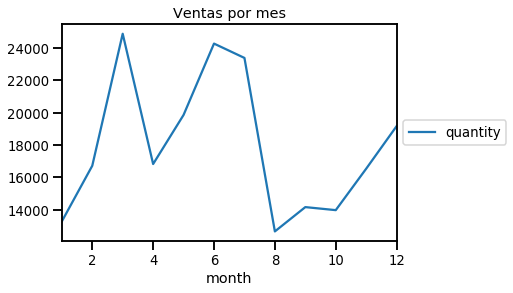

In [38]:
sns.set_context("talk", font_scale=0.8)
tp_by_month[('quantity')].plot(title = "Ventas por mes" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


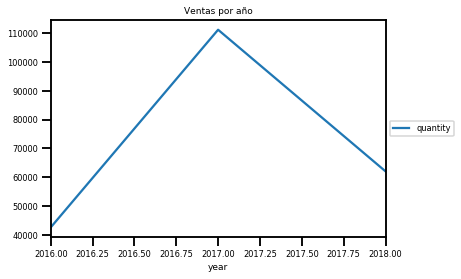

In [39]:
sns.set_context("talk", font_scale=0.5)
tp_by_year[('quantity')].plot(title = "Ventas por año" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#este quedó medio falopa, pero nos permite ver que el 2017 tiene mas cantidad. Asumimos que es porque
#hay más registros (están los de todo el año) y porque deben haber empezado a cargar más data en 2017.

In [40]:
#La idea ahora es ver si hay estacionalidad en algún mes con respecto a una marca (elegí las mas importantes)
#Primero filtramos por marca
tp_corona = tp_h.loc[tp_h['brand'] == 'Corona']
tp_importada = tp_h.loc[tp_h['brand'] == 'importada']
tp_Stella = tp_h.loc[tp_h['brand'] == 'Stella Artois']
tp_Patagonia = tp_h.loc[tp_h['brand'] == 'Patagonia Brewing Co.']
tp_BevyBar = tp_h.loc[tp_h['brand'] == 'BevyBar']

In [41]:
#No recuerdo si hacer este paso es necesario o no, lo dejo por las dudas.
tp_corona.groupby(['month'])['quantity'].sum()
tp_importada.groupby(['month'])['quantity'].sum()
tp_Stella.groupby(['month'])['quantity'].sum()
tp_Patagonia.groupby(['month'])['quantity'].sum()
tp_BevyBar.groupby(['month'])['quantity'].sum()

month
1      721
2      825
3     1198
4     1365
5     4871
6     1693
7     1569
8      877
9      340
10    2478
11    2154
12    2674
Name: quantity, dtype: int64

In [42]:
#Segundo agrupamos por mes y sumamos. Acá estaría creando varios datasets, tal vez no es necesario.
tp_BevyBar_month = tp_BevyBar.groupby(['month']).sum()
tp_Patagonia_month = tp_Patagonia.groupby(['month']).sum()
tp_importada_month = tp_importada.groupby(['month']).sum()
tp_Stella_month = tp_Stella.groupby(['month']).sum()
tp_Corona_month = tp_corona.groupby(['month']).sum()


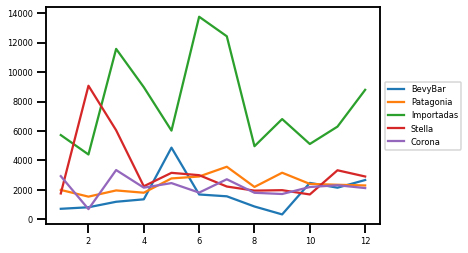

In [43]:
#visualizamos la variación por mes de cada una. Con barras tal vez quede mas lindo.
sns.set_context("talk", font_scale=0.5)
plt.plot(tp_BevyBar_month['quantity'], label='BevyBar')
plt.plot(tp_Patagonia_month['quantity'], label='Patagonia')
plt.plot(tp_importada_month['quantity'], label='Importadas')
plt.plot(tp_Stella_month['quantity'], label='Stella')
plt.plot(tp_Corona_month['quantity'], label='Corona')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#deberíamos hacer lo mismo pero 1 para cada año.

In [44]:
#Sale ese filtrado por categoría. Hago lo mismo que para Brand pero ahora con category.
tp_beer = tp_h.loc[tp_h['category'] == 'Beer']
np.shape(tp_beer)

(44355, 19)

In [45]:
tp_pack = tp_h.loc[tp_h['category'] == 'Mixed Pack']
np.shape(tp_pack)

(68524, 19)

In [46]:
tp_Merchandise = tp_h.loc[tp_h['category'] == 'Merchandise']
np.shape(tp_Merchandise)

(11067, 19)

In [47]:
tp_beer_month = tp_beer.groupby(['month']).sum()
tp_Merchandise_month = tp_Merchandise.groupby(['month']).sum()
tp_pack_month = tp_pack.groupby(['month']).sum()

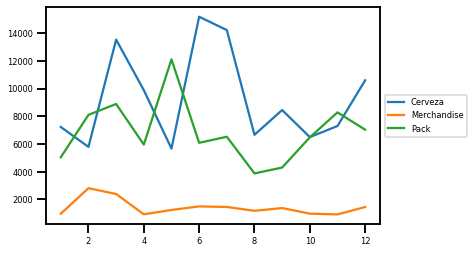

In [48]:
#visualizamos la variación por mes de cada una. Con barras tal vez quede mas lindo.
sns.set_context("talk", font_scale=0.5)
plt.plot(tp_beer_month['quantity'], label='Cerveza')
plt.plot(tp_Merchandise_month['quantity'], label='Merchandise')
plt.plot(tp_pack_month['quantity'], label='Pack')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
#Nuevamente, habría que hacer lo mismo pero para cada año (un plot para 2016, otro 2017 y otro 2018)

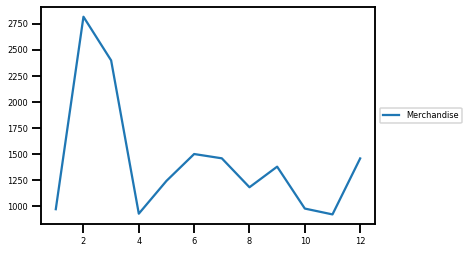

In [49]:
#Analizo Merchandise por separado
plt.plot(tp_Merchandise_month['quantity'], label='Merchandise')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [50]:
#Acá la idea es mostrar en qué meses se gasta más (y ver si hay relación con la quantity)
tp_by_month['unit_net_revenue_local']

month
1     4.601025e+06
2     5.967640e+06
3     8.269350e+06
4     5.586205e+06
5     1.015496e+07
6     6.413139e+06
7     6.331712e+06
8     4.364596e+06
9     3.467527e+06
10    5.318898e+06
11    7.099929e+06
12    6.366214e+06
Name: unit_net_revenue_local, dtype: float64

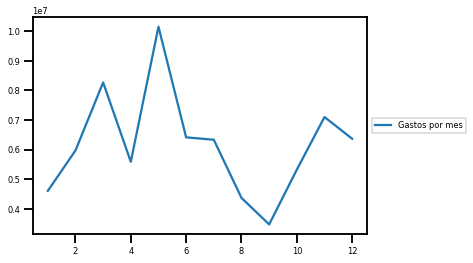

In [51]:
plt.plot(tp_by_month['unit_net_revenue_local'], label='Gastos por mes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [52]:
tp_by_brand = tp_h.groupby(['brand']).sum()

In [53]:
tp_by_brand

,unit_gross_revenue_local,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,year,month,day
brand,,,,,,,,
BevyBar,1.870186e+07,18310253.90,1.343941e+06,20765,1.491109e+07,35812279,122915,301381
Budweiser,2.071396e+05,198538.00,2.985957e+04,311,1.636864e+05,605400,2005,4526
Cervecería y Maltería Quilmes,9.618813e+05,808685.00,1.097740e+05,3051,7.530426e+05,3405359,11668,27109
Corona,2.219693e+07,17772734.00,2.186529e+06,26333,1.721940e+07,33966224,102534,282760
Craft Society,1.063276e+05,69648.52,1.283403e+04,305,8.796661e+04,403600,1400,3764
Multimarca,1.786876e+06,1593106.00,1.613407e+05,1408,1.441110e+06,2617346,8268,18723
Patagonia Brewing Co.,1.341495e+07,10660194.00,1.444438e+06,29038,1.074585e+07,39306684,134477,303973
Stella Artois,2.172734e+07,15566888.00,2.520963e+06,39412,1.711415e+07,54008382,144670,400017
importada,1.408761e+07,11669577.00,1.121945e+06,94879,1.137612e+07,86710650,289125,665897


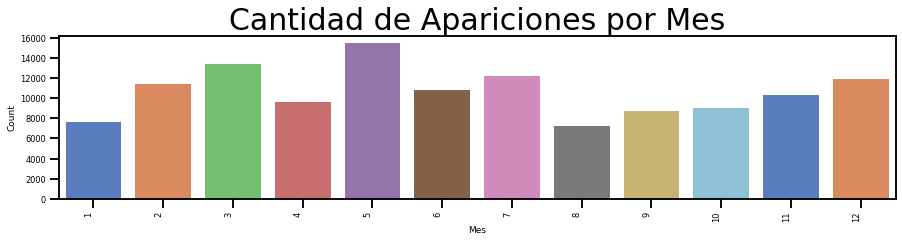

In [54]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="month", data=tp_h, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de Apariciones por Mes',size = 30)
plt.xlabel("Mes")
plt.ylabel("Count")
plt.show()

In [ ]:
##Usar solo 2017?
#Ver correlacion entre compradores recurrentes y algun producto en particular
#Clusterizar los que generan compras recurrentes

In [ ]:
#Borrar budweiser
#Usar solo 2017
#Juntar Bevybar y craftsociety
#Usar mas boxplot
#1° Definir 2017, las features finales finales
#2a-Regresion de 2017, predecir y comparar con enero 2018
#2-Clustering: armar el clustering y hacer un eda de los clusters
#2b
#Regresion, lineas de tiempo, etc --> Ver si podemos aplicarlo y ver si alguna marca esta creciendo, o no
